In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [4]:
def calculate_sr(state: BatsmanState):
    sr = (state['runs']/state['balls'])*100
    return {'sr': sr}

In [5]:
def calculate_bpb(state: BatsmanState):
    bpb = state['balls']/(state['fours'] + state['sixes'])
    return {'bpb': bpb}

In [6]:
def calculate_boundary_percent(state: BatsmanState):
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100
    return {'boundary_percent': boundary_percent}

In [7]:
def summary(state: BatsmanState):
    summary = f"""
    Strike Rate - {state['sr']} 
    Balls per boundary - {state['bpb']} 
    Boundary percent - {state['boundary_percent']}
    """
    return {'summary': summary}

In [9]:
# Build graph
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('generate_summary', summary)

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'generate_summary')
graph.add_edge('calculate_bpb', 'generate_summary')
graph.add_edge('calculate_boundary_percent', 'generate_summary')

graph.add_edge('generate_summary', END)

workflow = graph.compile()

In [10]:
# Test
initial_state = {
    "runs": 72,
    "balls": 45,
    "fours": 6,
    "sixes": 3
}

In [11]:
final_state = workflow.invoke(initial_state)
print(final_state["summary"])


    Strike Rate - 160.0 
    Balls per boundary - 5.0 
    Boundary percent - 58.333333333333336
    


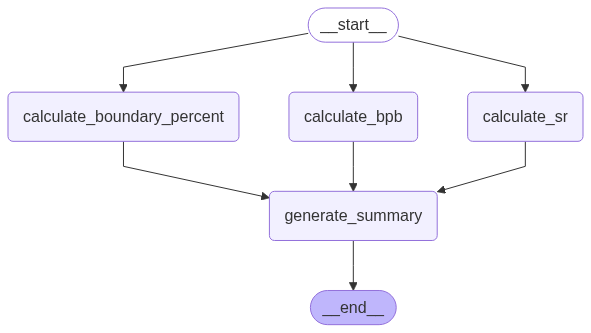

In [12]:
workflow

In [ ]:
intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

workflow.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\n    Strike Rate - 200.0 \n    Balls per boundary - 5.0 \n    Boundary percent - 48.0\n    '}